In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib widget
from sklearn.datasets import make_blobs
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
np.set_printoptions(precision=2)
from lab_utils_multiclass_TF import *
import logging
logging.getLogger("tensorflow").setLevel(logging.ERROR)
tf.autograph.set_verbosity(0)

In [2]:
# make 4-class dataset for classification
classes = 4
m = 100
centers = [[-5, 2], [-2, -2], [1, 2], [5, -2]]
std = 1.0
X_train, y_train = make_blobs(n_samples=m, centers=centers, cluster_std=std,random_state=30)

/Users/mirkowang/python/coursera/machinelearning/week5/lab_utils_multiclass_TF.py:63: UserWarning: No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored
  ax.scatter(X[idx, 0], X[idx, 1],  marker=m,


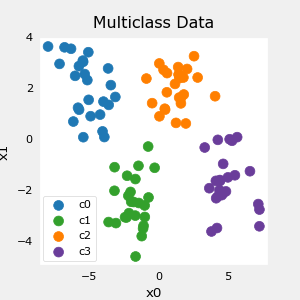

In [3]:
plt_mc(X_train,y_train,classes, centers, std=std)

In [4]:
# show classes in data set
print(f"unique classes {np.unique(y_train)}")
# show how classes are represented
print(f"class representation {y_train[:10]}")
# show shapes of our dataset
print(f"shape of X_train: {X_train.shape}, shape of y_train: {y_train.shape}")

unique classes [0 1 2 3]
class representation [3 3 3 0 3 3 3 3 2 0]
shape of X_train: (100, 2), shape of y_train: (100,)


In [10]:
tf.random.set_seed(1234)
model = Sequential(
    [
        Dense(2, activation = 'relu',   name = "L1"),
        Dense(4, activation = 'linear', name = "L2")
    ]
)

model.compile(
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    optimizer=tf.keras.optimizers.legacy.Adam(0.01),
)

model.fit(X_train, y_train, epochs=200)

Epoch 1/200
4/4 [==============================] - 0s 1ms/step - loss: 1.3617
Epoch 2/200
4/4 [==============================] - 0s 918us/step - loss: 1.2778
Epoch 3/200
4/4 [==============================] - 0s 798us/step - loss: 1.2111
Epoch 4/200
4/4 [==============================] - 0s 944us/step - loss: 1.1582
Epoch 5/200
4/4 [==============================] - 0s 740us/step - loss: 1.1107
Epoch 6/200
4/4 [==============================] - 0s 942us/step - loss: 1.0778
Epoch 7/200
4/4 [==============================] - 0s 961us/step - loss: 1.0472
Epoch 8/200
4/4 [==============================] - 0s 900us/step - loss: 1.0236
Epoch 9/200
4/4 [==============================] - 0s 3ms/step - loss: 1.0045
Epoch 10/200
4/4 [==============================] - 0s 1ms/step - loss: 0.9887
Epoch 11/200
4/4 [==============================] - 0s 768us/step - loss: 0.9759
Epoch 12/200
4/4 [==============================] - 0s 755us/step - loss: 0.9638
Epoch 13/200
4/4 [=========================

184/184 [==============================] - 0s 300us/step


/Users/mirkowang/python/coursera/machinelearning/week5/lab_utils_multiclass_TF.py:63: UserWarning: No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored
  ax.scatter(X[idx, 0], X[idx, 1],  marker=m,


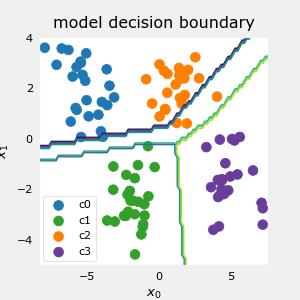

In [11]:
plt_cat_mc(X_train, y_train, model, classes)

In [12]:
# gather the trained parameters from the first layer
l1 = model.get_layer("L1")
W1,b1 = l1.get_weights()

/Users/mirkowang/python/coursera/machinelearning/week5/lab_utils_multiclass_TF.py:63: UserWarning: No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored
  ax.scatter(X[idx, 0], X[idx, 1],  marker=m,
/Users/mirkowang/python/coursera/machinelearning/week5/lab_utils_multiclass_TF.py:63: UserWarning: No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored
  ax.scatter(X[idx, 0], X[idx, 1],  marker=m,


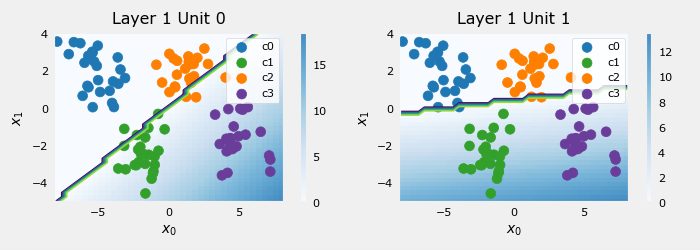

In [13]:
plt_layer_relu(X_train, y_train.reshape(-1,), W1, b1, classes)

/Users/mirkowang/python/coursera/machinelearning/week5/lab_utils_multiclass_TF.py:63: UserWarning: No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored
  ax.scatter(X[idx, 0], X[idx, 1],  marker=m,
/Users/mirkowang/python/coursera/machinelearning/week5/lab_utils_multiclass_TF.py:63: UserWarning: No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored
  ax.scatter(X[idx, 0], X[idx, 1],  marker=m,
/Users/mirkowang/python/coursera/machinelearning/week5/lab_utils_multiclass_TF.py:63: UserWarning: No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored
  ax.scatter(X[idx, 0], X[idx, 1],  marker=m,
/Users/mirkowang/python/coursera/machinelearning/week5/lab_utils_multiclass_TF.py:63: UserWarning: No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored
  ax.scatter(X[idx, 0], X[idx, 1],  marker=m,


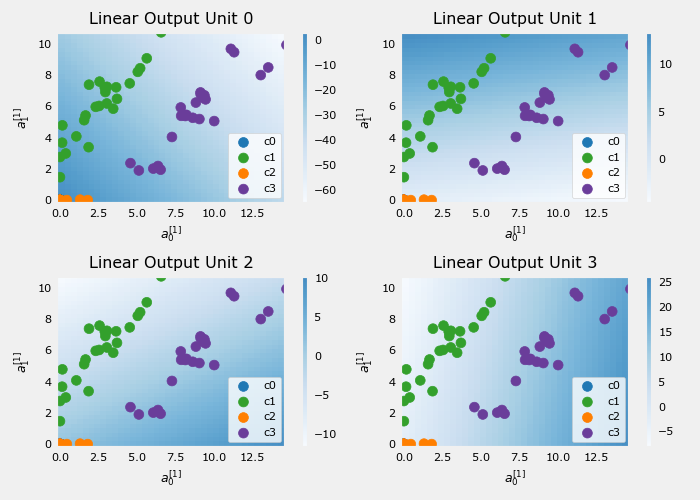

In [14]:
# gather the trained parameters from the output layer
l2 = model.get_layer("L2")
W2, b2 = l2.get_weights()
# create the 'new features', the training examples after L1 transformation
Xl2 = np.maximum(0, np.dot(X_train,W1) + b1)

plt_output_layer_linear(Xl2, y_train.reshape(-1,), W2, b2, classes,
                        x0_rng = (-0.25,np.amax(Xl2[:,0])), x1_rng = (-0.25,np.amax(Xl2[:,1])))